# DS 3000 Day 6

Sep 30 2022

### Admin:
- Qwickly attendance (both in-person and virtual)
- HW 1 grades finalized and solutions posted later today
- HW 3 due October 11
- Project Proposals due October 11
- Quiz 1 posted later today; will have 2 hours to complete by Sunday night (covers all material up to and including today)
- New modules for today and next Tuesday: `plotly` and `requests`
    - `pip install plotly requests`

### Content:
* Plotting with `matplotlib` and `seaborn`:
    * subplots
    * scatter plots
    * line plots
        - fill_between()
        
* plotly (interactive plots)
* (if time) intro to APIs

# Line Plots

What was the mean `Marriage_rate` over time in the dataset?

- `plt.plot()` (line plot)
- line style (width, color, dot/dash)
- label & legend
- `fill_between()`

In [1]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Remember the Korean Demographics data
# we can read zipped csv files too!
# source (https://www.kaggle.com/datasets/alexandrepetit881234/korean-demographics-20002022)
df_korea = pd.read_csv('korea_demo.zip')
df_korea

Date             Region    Birth  Birth_rate    Death  Death_rate  \
0     1/1/2000              Busan   3752.0       11.61   1875.0         5.8   
1     1/1/2000  Chungcheongbuk-do   1903.0       15.06    924.0         7.3   
2     1/1/2000  Chungcheongnam-do   2398.0       14.75   1466.0         9.0   
3     1/1/2000              Daegu   3057.0       14.39   1117.0         5.3   
4     1/1/2000            Daejeon   1859.0       16.08    565.0         4.9   
...        ...                ...      ...         ...      ...         ...   
4855  6/1/2022       Jeollanam-do    565.0        3.80   1369.0         9.1   
4856  6/1/2022             Sejong    248.0        7.90    106.0         3.4   
4857  6/1/2022              Seoul   3137.0        4.10   3631.0         4.7   
4858  6/1/2022              Ulsan    443.0        4.80    434.0         4.7   
4859  6/1/2022      Whole country  18830.0        4.50  24850.0         5.9   

      Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0       814.0           2.5    2435.0            7.5          1877.0   
1       220.0           1.7     828.0            6.6           979.0   
2       321.0           2.0    1055.0            6.5           932.0   
3       422.0           2.0    1577.0            7.4          1940.0   
4       280.0           2.4     868.0            7.5          1294.0   
...       ...           ...       ...            ...             ...   
4855    299.0           2.0     479.0            3.2          -805.0   
4856     43.0           1.4     123.0            3.9           141.0   
4857   1088.0           1.4    2630.0            3.4          -494.0   
4858    154.0           1.7     316.0            3.5             9.0   
4859   7586.0           1.8   14898.0            3.5         -6019.0   

      Natural_growth_rate  
0                     5.8  
1                     7.7  
2                     5.7  
3                     9.1  
4                    11.2  
...                   ...  
4855                 -5.4  
4856                  4.5  
4857                 -0.6  
4858                  0.1  
4859                 -1.4  

[4860 rows x 12 columns]

In [3]:
# can look at the unique dates in the data set
# df_korea['Date'].unique()

# unfortunately, these are strings right now, not dates
# use .to_datetime from pandas to convert a string column to a date (pay attention to format of dates)
df_korea['Date'] = pd.to_datetime(df_korea['Date'], format = '%m/%d/%Y')
df_korea.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0 2000-01-01              Busan  3752.0       11.61  1875.0         5.8   
1 2000-01-01  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2 2000-01-01  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3 2000-01-01              Daegu  3057.0       14.39  1117.0         5.3   
4 2000-01-01            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

In [4]:
# need to remove the Whole country observations (otherwise mean will be skewed)
bool_nocountry = df_korea['Region'] != 'Whole country'
df_korea_new = df_korea.loc[bool_nocountry, :]

# check the values of Region in the new data set to make sure Whole country is gone
df_korea_new['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype=object)

In [5]:
mean_marriage_by_date = df_korea_new.groupby('Date')['Marriage_rate'].mean()
mean_marriage_by_date

Date
2000-01-01    7.306250
2000-02-01    6.956250
2000-03-01    7.437500
2000-04-01    6.912500
2000-05-01    8.356250
                ...   
2022-02-01    3.870588
2022-03-01    3.447059
2022-04-01    3.658824
2022-05-01    3.805882
2022-06-01    3.452941
Name: Marriage_rate, Length: 270, dtype: float64

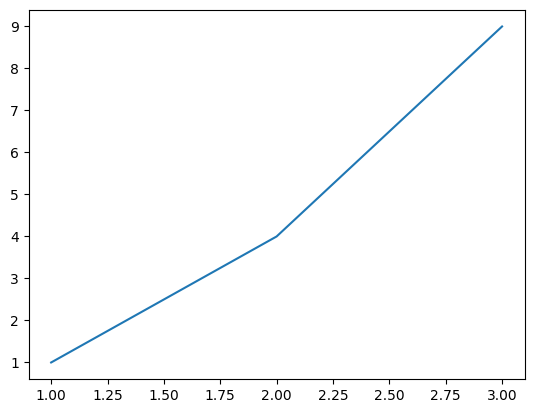

In [6]:
# simple line example
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y)

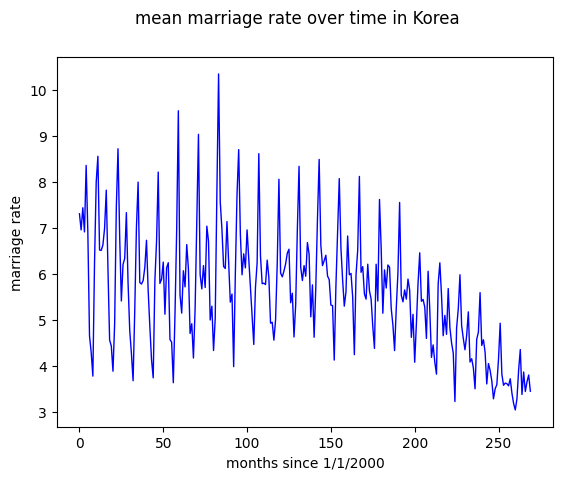

In [7]:
# linestyle ':' dotted, '--' dashed, '-.' mixed, '-' solid
date = range(mean_marriage_by_date.size)
plt.plot(date, mean_marriage_by_date,
        color='b', linewidth=1, linestyle='-')
plt.xlabel('months since 1/1/2000')
plt.ylabel('marriage rate')
plt.suptitle('mean marriage rate over time in Korea');

## `plt.fill_between()`

Shades between two line plots.  Great for showing how the data is distributed around its mean

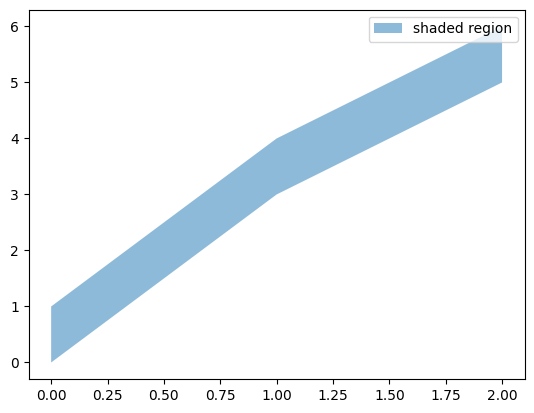

In [8]:
# simple fill between example
x = [0, 1, 2]
top = [1, 4, 6]
btm = [0, 3, 5]
plt.fill_between(x, top, btm, alpha=.5, label='shaded region')
plt.legend()

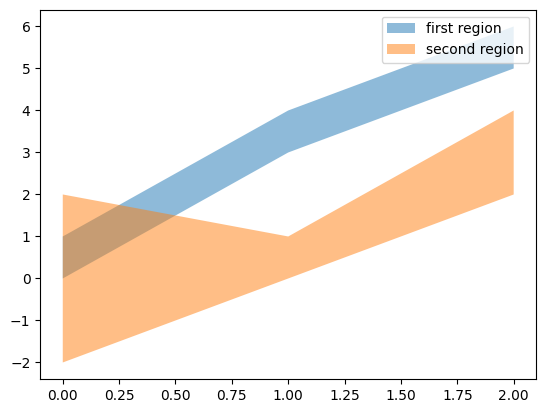

In [9]:
# slightly more complex example
x = [0, 1, 2]
regions = pd.Series({'top1': [1, 4, 6],
                    'top2': [2, 1, 4],
                    'btm1': [0, 3, 5],
                    'btm2': [-2, 0, 2]})
labels = ['first region', 'second region']

for area in range(2):
    plt.fill_between(x, regions[area], regions[area+2], alpha = .5, label = labels[area])

plt.legend()

# Lecture Break/Practice

Download the `pokedata.csv` file from the Homeworks Module in Canvas and make sure it is stored in the same directory as this `day6.ipynb` lecture file. Take about 10 minutes and make **one** plot that demonstrates the answer to some question(s) you might be interested in concerning the original 151 Pokémon. If you are struggling to come up with a question, below are some *suggestions*. When you are done, share your findings with your neighbor(s), making sure to explain what the plot you made means/how it helps answer your question.

Some possible questions to address with your plot(s):
- How does Pokémon height differ across types?
- Do Pokémon with higher Pokédex values generally have better (higher) damage?
- What is the relationship between a Pokémon's weight and their speed?

**Note:** you may wish to look at the `day5.ipynb` for inspiration.

## Tip: Shop around for just the right graph

Seaborn has some more niche graphs which are fantastic for specific applications.  While we won't cover the syntax on each of these, you'll find they're similar to what we've already covered.

Take a few minutes outside of class to browse these graphs to see whats out there:

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

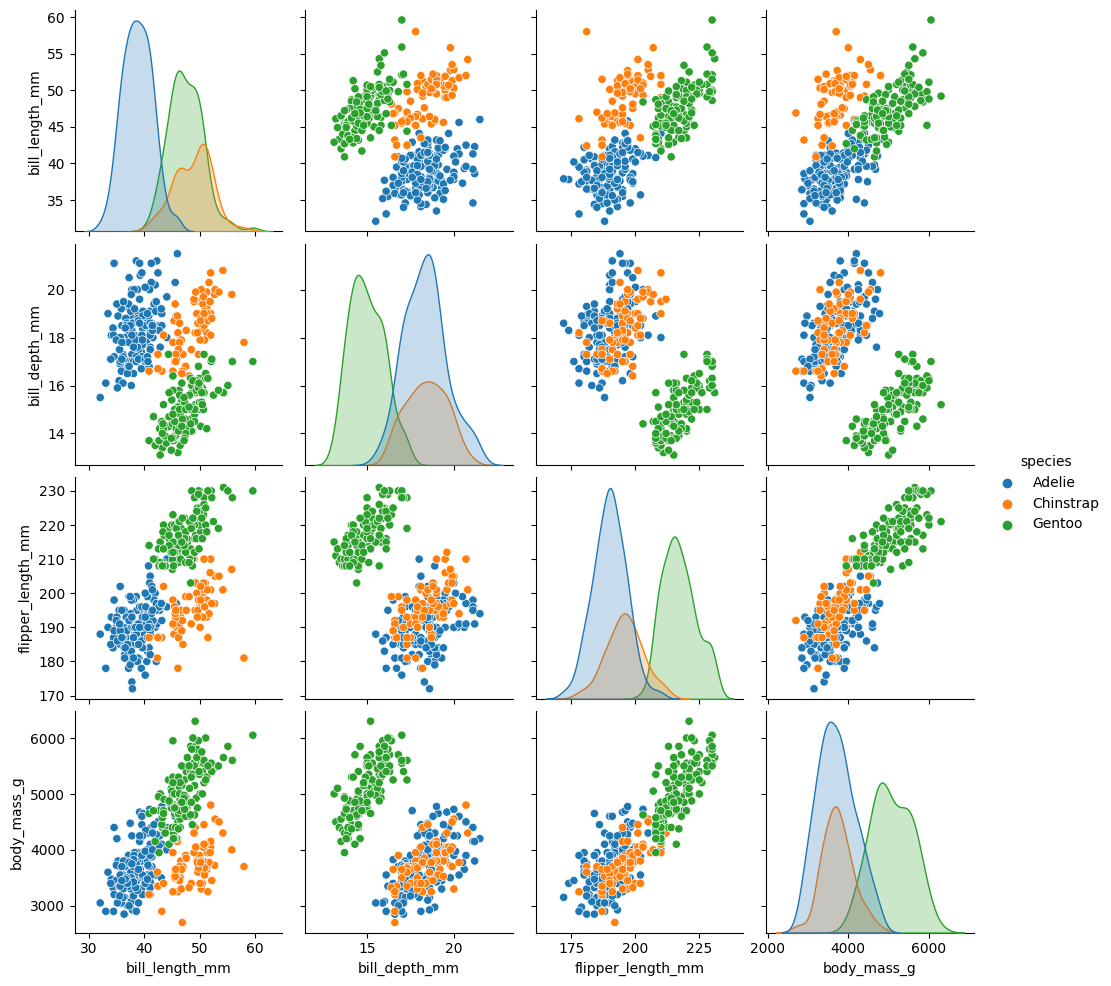

In [10]:
df_penguin = sns.load_dataset('penguins')

sns.pairplot(df_penguin, hue='species')

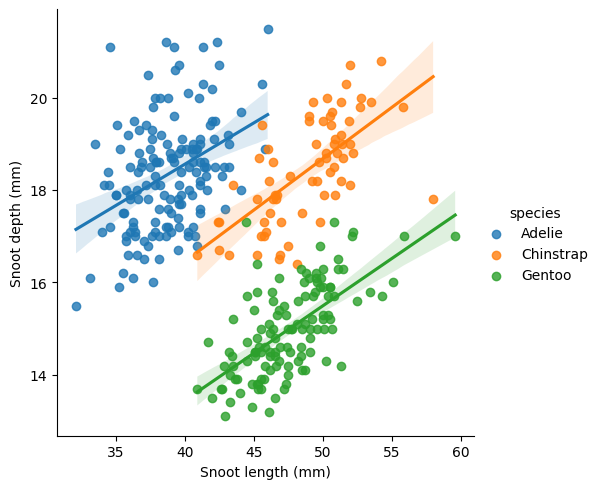

In [11]:
# Plot bill depth as a function of bill length by species
g = sns.lmplot(
    data=df_penguin,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

# Plotly
* Interactive visualization library
* https://plot.ly/python/ (https://plot.ly/python/getting-started/)
* Plotly is a big library, plotly express is a simplified interface
* Plotly uses different syntax as matplotlib / seaborn :(!

### Plotly scatter plots
- `hover_data`
- `color`
- `symbol`
- `size`

In [12]:
# seaborn has some default data sets (like the penguins one)
df_titanic = sns.load_dataset('titanic')

# drop any rows (passengers) which are missing any data
# (we'll cover data cleaning in more detail later in semester too)
df_titanic = df_titanic.dropna()

df_titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True

In [13]:
import plotly.express as px

px.scatter(data_frame=df_titanic, x='age', y='fare', color='embark_town', hover_data=['sex', 'pclass', 'alive'], symbol='who')

## Korean Demographics Data

In [14]:
# use the df_korea_new which removed Whole country
# discard rows which are missing any feature
df_korea_nomiss = df_korea_new.dropna(axis=0, how='any')
df_korea_nomiss.shape

(4439, 12)

In [15]:
df_korea_nomiss.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0 2000-01-01              Busan  3752.0       11.61  1875.0         5.8   
1 2000-01-01  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2 2000-01-01  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3 2000-01-01              Daegu  3057.0       14.39  1117.0         5.3   
4 2000-01-01            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

In [16]:
px.scatter(df_korea_nomiss, x='Marriage_rate', y='Natural_growth_rate', hover_data=['Date', 'Region'], size='Divorce_rate')

## The Get to Know You Data

In [17]:
gtky = pd.read_csv('cleaner_gtky.csv', index_col='fake_student_id')
# only drop rows with missing values from one (or a list of several) columns
gtky_nomiss = gtky.dropna(axis=0, subset=['ideal_start_salary_thousands'])
gtky_nomiss.shape

(88, 10)

In [18]:
fig = px.scatter(data_frame=gtky_nomiss, x='age_months', y='prog_exp', color='class', hover_data=['co_op'], size='ideal_start_salary_thousands')
fig.show()

## Saving a Plotly Figure
* html is a great format to share your *interactive* plot

In [19]:
import plotly

plotly.offline.plot(fig, filename='class_data.html');

## Plotly does line plots too

- color

In [20]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'x':  [1, 2, 3, 4, 5, 6],
                   'y':  [2, 3, 4, 7, 10, 24],
                  'grp': [0, 1, 0, 1, 0, 1]})
df

x   y  grp
0  1   2    0
1  2   3    1
2  3   4    0
3  4   7    1
4  5  10    0
5  6  24    1

In [21]:
px.line(data_frame=df, x='x', y='y')

In [22]:
px.line(data_frame=df, x='x', y='y', color='grp')

# Basic tools in preparation for APIs

While we will wait to use this until next time, the `requests` module comes into play soon. While you should have installed it in the terminal earlier, it is actually a [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-pip) command, which means it can be installed directly from jupyter (should you ever need to install it again, or if you had difficulty installing it earlier).

In [23]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


## Building a DataFrame row by row

We often get data in chunks (web scraping / API calls).  We'll need to store our data incrementally:

In [24]:
# here we use the .append() command, which python warns us will need to be replaced with .concat() in the future
dict_list = [{'a': 1, 'b': 2, 'c': 3},
             {'a': 4, 'b': 3874, 'c': 398}]

df = pd.DataFrame()

for d in dict_list:
    df = df.append(pd.Series(d), ignore_index=True)
    
df

/tmp/ipykernel_7901/1457474138.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_7901/1457474138.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



a     b    c
0  1     2    3
1  4  3874  398

In [25]:
# to include index names
list_dict = [{'a': 1, 'b': 2, 'c': 3},
            {'a': 4, 'b': 3874, 'c': 398}]

name_list = ['first', 'second']

df = pd.DataFrame()
for idx in range(2):
    # extract dictionary & name
    d = list_dict[idx]
    name = name_list[idx]
    
    # build series and name it
    series = pd.Series(d, name=name)
    
    df = df.append(series)
    
df

# to avoid getting the FutureWarning, add the below line in front of the first time you call import pandas as pd:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

/tmp/ipykernel_7901/3250737448.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_7901/3250737448.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



a     b    c
first   1     2    3
second  4  3874  398

# Timestamps

Many datasets include a timestamp, or include a date/time as a feature in the dataset. Understanding how to deal with these is important! We actually already used pandas `.to_datetime()` function with the Korean Demographics data to cast strings to `datetime` objects. 

## Unix Time

- [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) Coordinated Universal Time
    - time zone at 0 deg longitude
        - how is 0 deg longitude defined?  
            - A succesfully warring empire (United Kingdom) chose it 
                - (It would be convenient if a metric system loving empire had been more successful at war ...)
- [Unix Time](https://en.wikipedia.org/wiki/Unix_time) is The number of seconds which have passed since 00:00:00 UTC on 1 Jan 1970 (ignoring leap seconds)
- UTC is time zone agnostic 
    - (more on this next lesson...)

## Python's `datetime` & `timedelta`
- helpful for all those pesky unit conversions

In [26]:
from datetime import datetime, timedelta

# would you believe that the below is exactly 2 am on Valentine's Day 2021?
utc_example = 1613286000

# assumes the time zone of the machine its running on!
dt0 = datetime.fromtimestamp(utc_example)
dt0

datetime.datetime(2021, 2, 14, 2, 0)

In [27]:
# what about right.... now?
dt1 = datetime.now()
dt1

datetime.datetime(2022, 9, 28, 15, 5, 48, 301959)

In [28]:
# we can set future dates as well
dt2 = datetime(year=2031, month=4, day=15, hour=9, minute=26, second=53)
dt2

datetime.datetime(2031, 4, 15, 9, 26, 53)

In [29]:
# we can access meaningful date attributes of a datetime object
# year, month, day, hour, minute, second
dt2.month, dt2.day

(4, 15)

In [30]:
# we can add / subtract timedelta objects
offset = timedelta(days=5, seconds=8979)

print(dt2)
print(dt2 + offset)

2031-04-15 09:26:53
2031-04-20 11:56:32


In [31]:
# use strptime to take the time from strings contain other words
datetime.strptime('the time is now: September-30-2022 3:20 PM', 'the time is now: %B-%d-%Y %H:%M %p')

datetime.datetime(2022, 9, 30, 3, 20)

In [32]:
# use strftime to cast a time to a string that contains other words
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
s = datetime.now().strftime('the time is now: %B-%d-%Y %H:%M %p')
s

'the time is now: September-28-2022 15:05 PM'

In [33]:
# you can save useful time info in a dictionary (which could then become a series -> data frame)
dt = datetime.now()
{'hour': dt.hour,
'minute': dt.minute}

{'hour': 15, 'minute': 5}

In [34]:
# you can figure out how old you are in seconds
eric_age = (datetime.now() - datetime(year=1990, month=12, day=20, hour=22, minute=42)).total_seconds()
print(eric_age)
# put it in billions (it wasn't long ago that I turned 1 billion!)
eric_age/ 1e09

1002644628.858437


1.002644628858437

# Rest of Class Activity (if time; otherwise, next time!)

A logarithmic birthday party is the moment you are some integer power of 10 seconds old (1 second old, 10 seconds old, 100 seconds old, ...)

Compute your first 10 logarithmic birthday parties, store them in a dataframe as shown below.  (You're welcome to use a fake birthday if you'd like)

|  log_bday |   year |  month |  day |   hour | minute|sec |
|----------:|-------:|-------:|-----:|-------:|------:|---:|
|  10^0 sec | 1990   |  12    |  20  |   10   |   42  |  1 |
|  10^1 sec | 1990   |  12    |  20  |   10   |   42  | 10 |
|  10^2 sec | 1990   |  12    |  20  |   10   |   43  | 40 |
|  10^3 sec | 1990   |  12    |  20  |   10   |   58  | 40 |
|  10^4 sec | 1990   |  12    |  20  |   13   |   28  | 40 |
|  10^5 sec | 1990   |  12    |  21  |   14   |   28  | 40 |
|  10^6 sec | 1991   |   1    |   1  |    0   |   28  | 40 |
|  10^7 sec | 1991   |   4    |  15  |    4   |   28  | 40 |
|  10^8 sec | 1994   |   2    |  19  |   20   |   28  | 40 |
|  10^9 sec | 2022   |   8    |  28  |   12   |   28  | 40 |
| 10^10 sec | 2307   |  11    |  10  |    4   |   28  | 40 |

(++) add a column with a more easily readable time (e.g. `August-28-2022 12:28 PM`)

In [35]:
exp=0
f'10^{exp}sec'

'10^0sec'